In [14]:
import pandas as pd

# Load the preprocessed data
df = pd.read_csv("smmh_final_model_ready.csv")

# Features and target
X = df.drop(columns=['18. How often do you feel depressed or down?'])
# All columns except target
y = df['18. How often do you feel depressed or down?']                 # Target variable

In [16]:
df.columns

Index(['1. What is your age?', '6. Do you use social media?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
       '17. How often do you look to seek validation from features of social media?',
       '18. How often do you feel depressed or down?',
       '19. O

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression Report
              precision    recall  f1-score   support

           1       0.38      0.55      0.44        11
           2       0.25      0.13      0.17        15
           3       0.28      0.23      0.25        22
           4       0.35      0.38      0.36        21
           5       0.43      0.53      0.48        19

    accuracy                           0.35        88
   macro avg       0.34      0.36      0.34        88
weighted avg       0.34      0.35      0.34        88

Random Forest Report
              precision    recall  f1-score   support

           1       0.50      0.55      0.52        11
           2       0.18      0.13      0.15        15
           3       0.26      0.27      0.27        22
           4       0.35      0.38      0.36        21
           5       0.47      0.47      0.47        19

    accuracy                           0.35        88
   macro avg       0.35      0.36      0.36        88
weighted avg       0.34      

In [24]:
#Regularization, cross validation, L1regularizer, statistica

In [26]:
# Predictions on training data
y_train_pred_lr = lr.predict(X_train)
y_train_pred_rf = rf.predict(X_train)

# Evaluation on training data
print("Logistic Regression - Training Report")
print(classification_report(y_train, y_train_pred_lr))

print("Random Forest - Training Report")
print(classification_report(y_train, y_train_pred_rf))


Logistic Regression - Training Report
              precision    recall  f1-score   support

           1       0.76      0.74      0.75        43
           2       0.48      0.44      0.46        59
           3       0.49      0.47      0.48        88
           4       0.52      0.56      0.54        81
           5       0.49      0.53      0.51        78

    accuracy                           0.53       349
   macro avg       0.55      0.55      0.55       349
weighted avg       0.53      0.53      0.53       349

Random Forest - Training Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        88
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00        78

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighte

In [28]:
from sklearn.metrics import roc_auc_score

# For Logistic Regression
y_pred_prob_lr = lr.predict_proba(X_test)  # Get the predicted probabilities
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr, multi_class='ovr')
print("ROC-AUC Score for Logistic Regression:", roc_auc_lr)

# For Random Forest
y_pred_prob_rf = rf.predict_proba(X_test)  # Get the predicted probabilities
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovr')
print("ROC-AUC Score for Random Forest:", roc_auc_rf)


ROC-AUC Score for Logistic Regression: 0.7024678197306087
ROC-AUC Score for Random Forest: 0.7152449186604706


### Random Forest Regularization Train a better-tuned Random Forest:

C:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:27:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.29      0.27      0.28        15
           2       0.36      0.41      0.38        22
           3       0.38      0.24      0.29        21
           4       0.48      0.63      0.55        19

    accuracy                           0.41        88
   macro avg       0.41      0.42      0.41        88
weighted avg       0.40      0.41      0.40        88

Confusion Matrix (XGBoost):
[[ 6  2  1  0  2]
 [ 4  4  4  2  1]
 [ 0  4  9  3  6]
 [ 1  4  7  5  4]
 [ 0  0  4  3 12]]
ROC-AUC Score (XGBoost): 0.7186840242409595


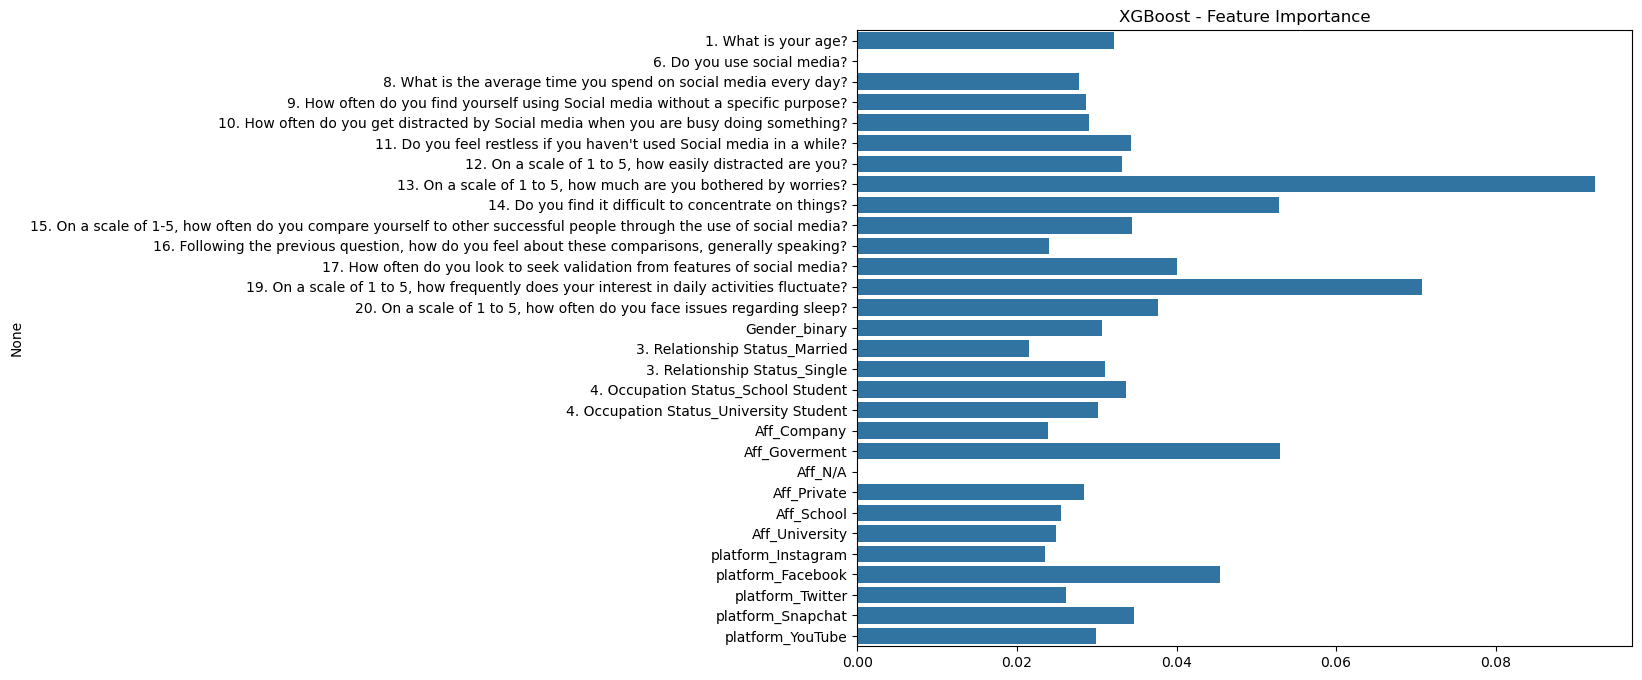

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("smmh_final_model_ready.csv")

# Define features and target
X = df.drop(columns=['18. How often do you feel depressed or down?'])
y = df['18. How often do you feel depressed or down?']

# Label Encode the target to make sure it's 0, 1, 2, 3, 4 (starting at 0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize and train XGBoost Classifier
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,  # Avoid warnings
    eval_metric='mlogloss'     # Needed for multi-class
)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

# ROC-AUC (only for binary classification, or else micro/macro average for multiclass)
roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
print("ROC-AUC Score (XGBoost):", roc_auc)

# Feature Importance Plot
feature_importance = xgb.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,8))
sns.barplot(x=feature_importance, y=features)
plt.title("XGBoost - Feature Importance")
plt.savefig('Feature importance.png', dpi=300)  # SAVE THE FIGURE
plt.show()


C:\Users\ankit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:27:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ankit\AppData\Local\Temp\ipykernel_11004\2591778766.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette="Blues_d")


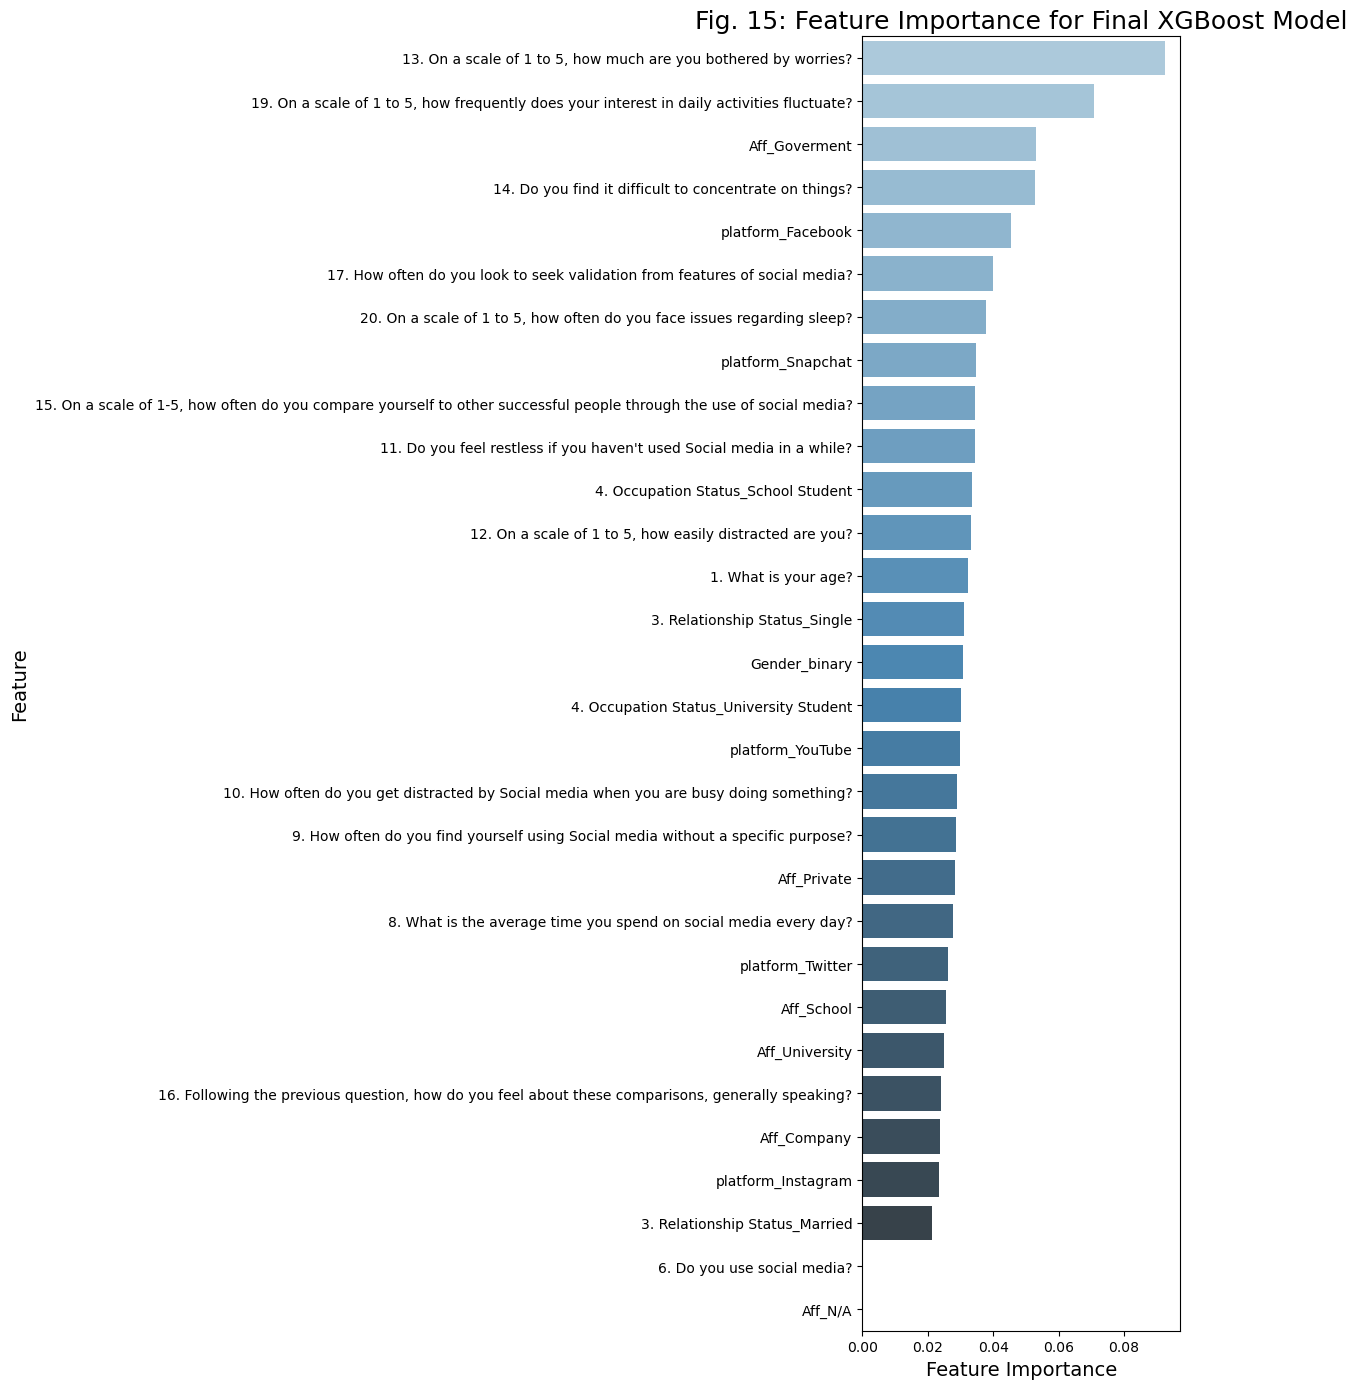

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("smmh_final_model_ready.csv")

# Define features and target
X = df.drop(columns=['18. How often do you feel depressed or down?'])
y = df['18. How often do you feel depressed or down?']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train XGBoost model
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb.fit(X_train, y_train)

# Feature Importances
feature_importance = xgb.feature_importances_
features = X_train.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot all features
plt.figure(figsize=(12, 14))  # Larger height for many features
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette="Blues_d")
plt.title('Fig. 15: Feature Importance for Final XGBoost Model', fontsize=18)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.savefig('All_Feature_Importance_XGBoost.png', dpi=300)  # Save high-quality image
plt.show()


C:\Users\ankit\AppData\Local\Temp\ipykernel_11004\4043449970.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette="Blues_d")


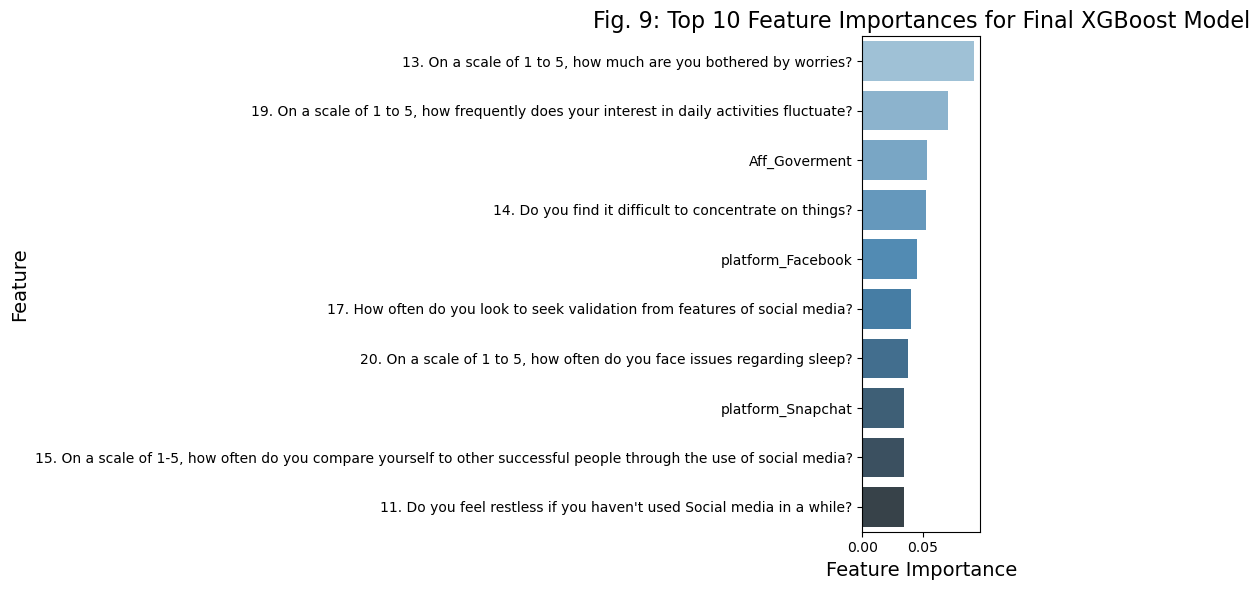

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have:
# feature_importance = xgb.feature_importances_
# features = X_train.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort by importance descending
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Take top 10 features
top_features = feat_imp_df.head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette="Blues_d")
plt.title('Fig. 9: Top 10 Feature Importances for Final XGBoost Model', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.savefig('Top10_Feature_Importance_XGBoost.png', dpi=300)  # Save figure
plt.show()


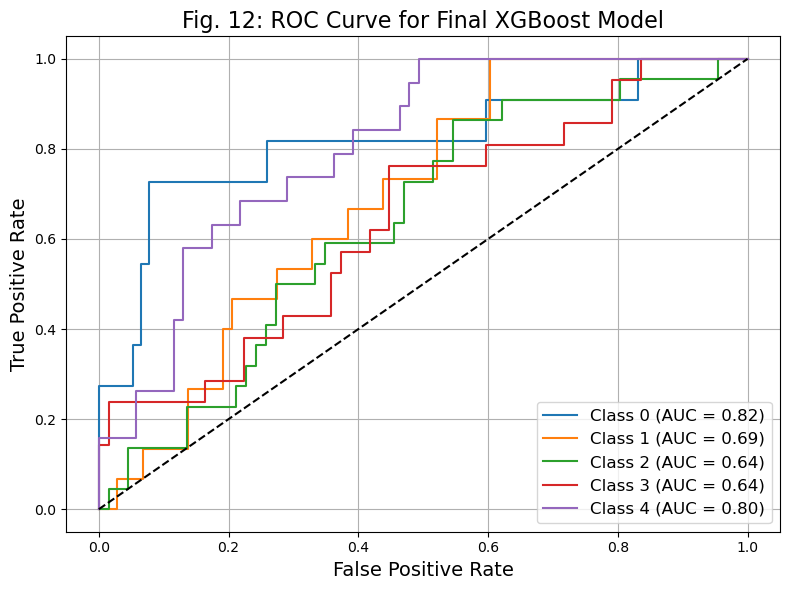

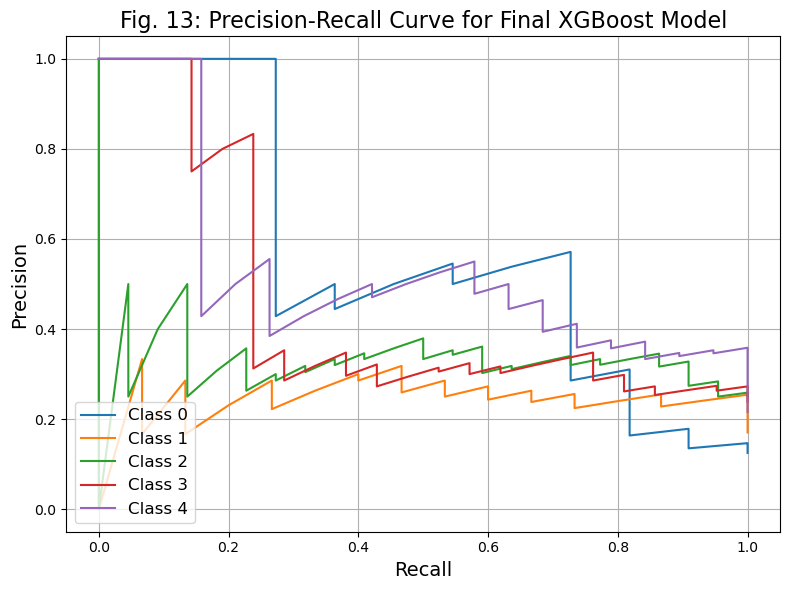

<Figure size 600x500 with 0 Axes>

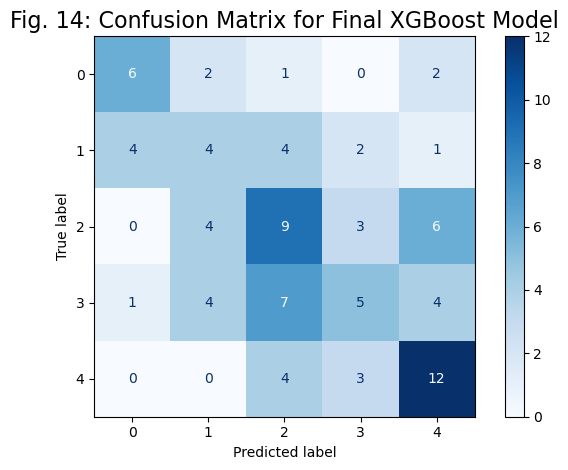

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

# Predict probabilities
y_proba_xgb = xgb.predict_proba(X_test)

# Binarize labels
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# ROC and PR calculation
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba_xgb[:, i])

# --------- ROC Curve ---------
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
plt.plot([0,1], [0,1], 'k--')
plt.title('Fig. 12: ROC Curve for Final XGBoost Model', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('ROC_Curve_XGBoost.png', dpi=300)  # SAVE THE FIGURE
plt.show()

# --------- Precision-Recall Curve ---------
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i}')
    
plt.title('Fig. 13: Precision-Recall Curve for Final XGBoost Model', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('Precision_Recall_Curve_XGBoost.png', dpi=300)  # SAVE THE FIGURE
plt.show()

# --------- Confusion Matrix ---------
plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay.from_estimator(
    xgb, X_test, y_test,
    display_labels=np.unique(y_test),
    cmap='Blues',
    values_format='d'
)
plt.title('Fig. 14: Confusion Matrix for Final XGBoost Model', fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.savefig('Confusion_Matrix_XGBoost.png', dpi=300)  # SAVE THE FIGURE
plt.show()


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize SVM with RBF kernel and C=1
svm = SVC(kernel='rbf', C=1, probability=True, random_state=42)

# Train the SVM model
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)

# Evaluation
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

# ROC-AUC Score
y_proba_svm = svm.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba_svm, multi_class='ovr')
print("ROC-AUC Score (SVM):", roc_auc)


Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.00      0.00      0.00        15
           2       0.20      0.23      0.21        22
           3       0.32      0.57      0.41        21
           4       0.53      0.42      0.47        19

    accuracy                           0.34        88
   macro avg       0.32      0.33      0.32        88
weighted avg       0.31      0.34      0.32        88

Confusion Matrix (SVM):
[[ 5  0  3  2  1]
 [ 3  0  9  3  0]
 [ 1  1  5 12  3]
 [ 0  1  5 12  3]
 [ 0  0  3  8  8]]
ROC-AUC Score (SVM): 0.6981179599538645


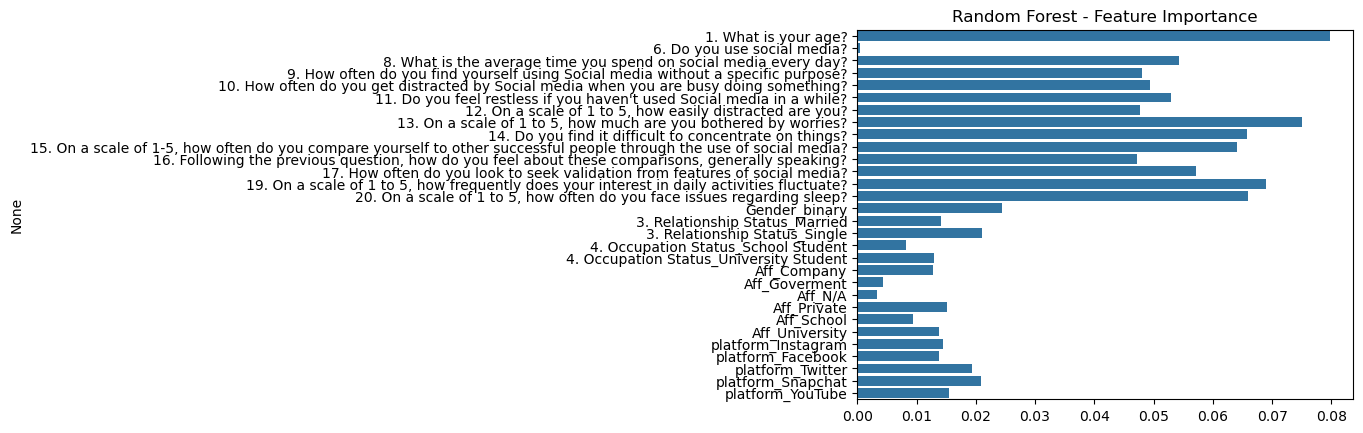

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = rf.feature_importances_
features = X_train.columns

sns.barplot(x=feature_importance, y=features)
plt.title("Random Forest - Feature Importance")
plt.show()


Classification Report (SVM):
              precision    recall  f1-score   support

           1       0.56      0.45      0.50        11
           2       0.00      0.00      0.00        15
           3       0.20      0.23      0.21        22
           4       0.32      0.57      0.41        21
           5       0.53      0.42      0.47        19

    accuracy                           0.34        88
   macro avg       0.32      0.33      0.32        88
weighted avg       0.31      0.34      0.32        88



ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

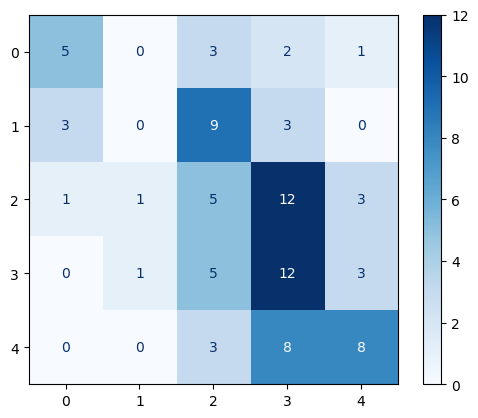

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv("smmh_final_model_ready.csv")

# Define features and target
X = df.drop(columns=['18. How often do you feel depressed or down?'])
y = df['18. How often do you feel depressed or down?']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train SVM model
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Print classification report
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Depression", "Depression"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_proba_lr = lr.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Voting Ensemble
voting = VotingClassifier(estimators=[
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('svm', svm)
], voting='soft')
voting.fit(X_train, y_train)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib

# Load dataset (update with your file name)
df = pd.read_csv("smmh_final_model_ready.csv")

# Features and target
X = df.drop(columns=['18. How often do you feel depressed or down?'])
y = df['18. How often do you feel depressed or down?']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Plot ROC & Precision-Recall
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title("ROC Curve")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.title("Precision-Recall Curve")
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    avg_prec = average_precision_score(y_test, y_score)
    plt.plot(recall, precision, label=f"{name} (AP = {avg_prec:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Save the best model (e.g., SVM)
joblib.dump(models["SVM"], "best_model.pkl")
print("Saved model to 'best_model.pkl'")


In [ ]:
import joblib
joblib.dump(model, "best_model.pkl")


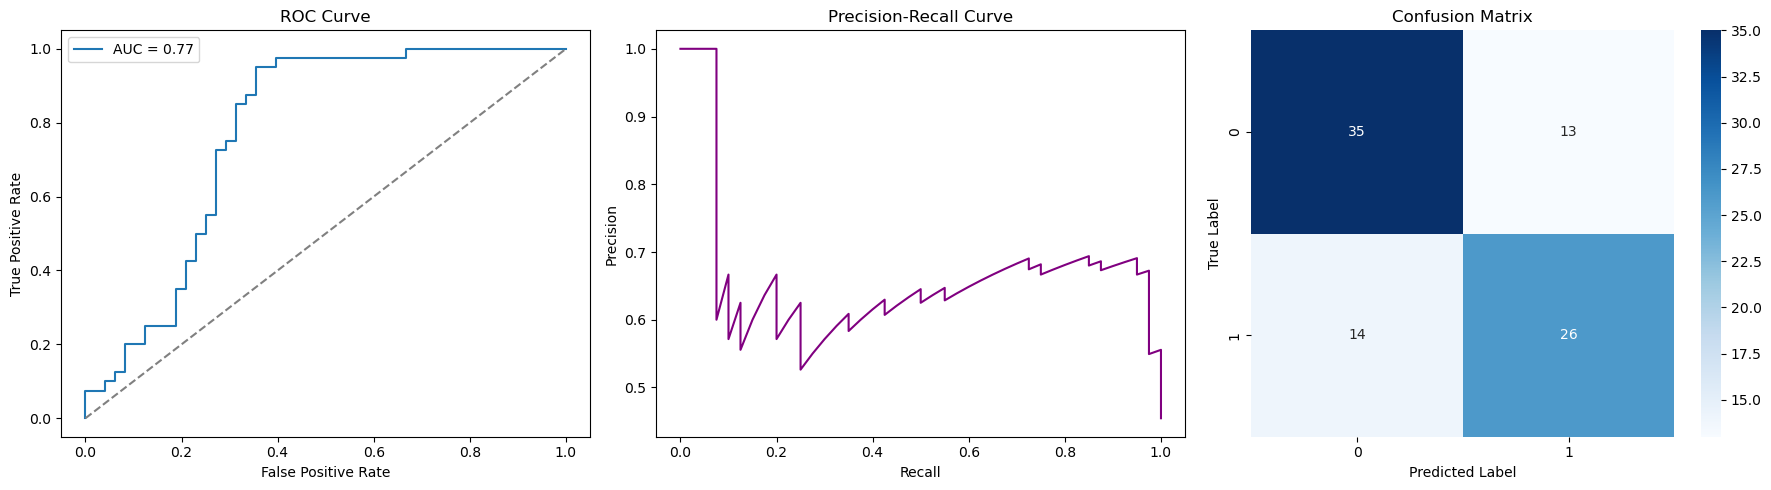

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix

# Assuming you already have:
# y_test (true labels)
# y_pred (predicted labels)
# y_proba (predicted probabilities for class 1)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the layout
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# ROC Curve
axs[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axs[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
axs[0].set_title("ROC Curve")
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].legend()

# Precision-Recall Curve
axs[1].plot(recall, precision, color="purple")
axs[1].set_title("Precision-Recall Curve")
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[2])
axs[2].set_title("Confusion Matrix")
axs[2].set_xlabel("Predicted Label")
axs[2].set_ylabel("True Label")

plt.tight_layout()
plt.show()



Full Evaluation Metrics:
Accuracy                : 0.6818
Precision               : 0.6500
Recall                  : 0.6500
F1 Score                : 0.6500
ROC AUC                 : 0.7612
Log Loss                : 0.5613
Cohen's Kappa           : 0.3583
Matthews Corr Coef      : 0.3583
Average Precision (PR AUC): 0.6383
Brier Score Loss        : 0.1937

Confusion Matrix:
[[34 14]
 [14 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        48
           1       0.65      0.65      0.65        40

    accuracy                           0.68        88
   macro avg       0.68      0.68      0.68        88
weighted avg       0.68      0.68      0.68        88



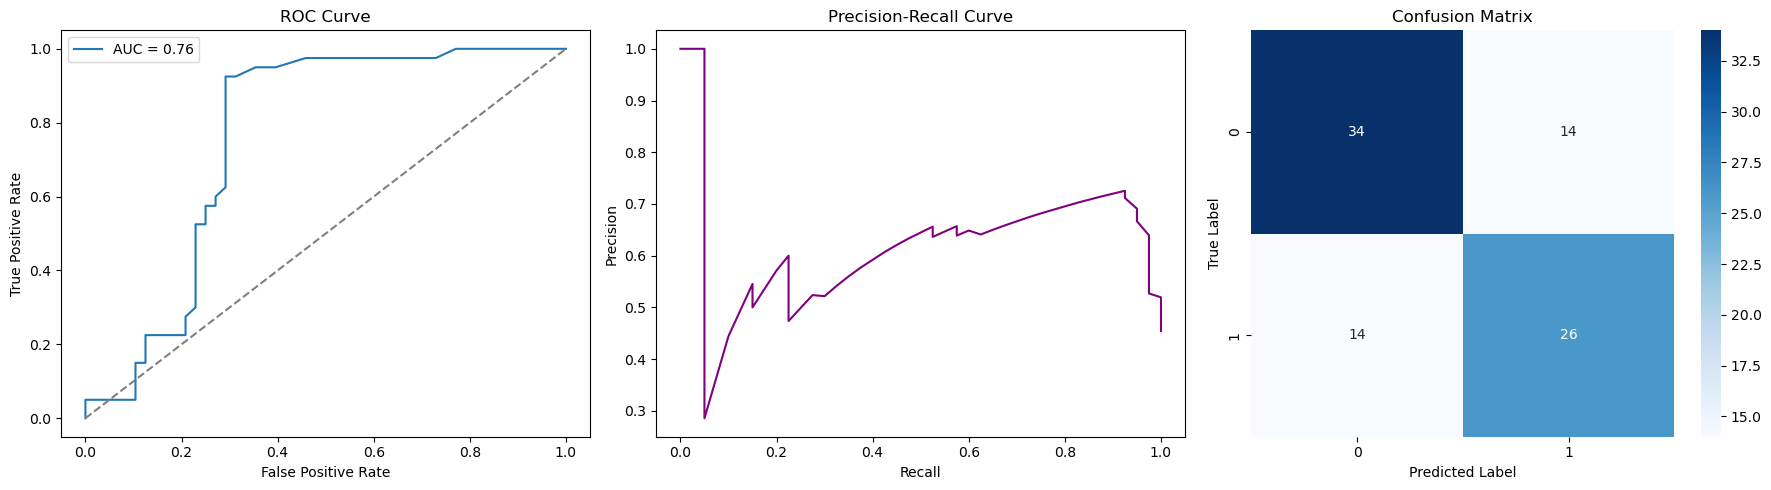

In [105]:
# 📦 Imports
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, log_loss, roc_curve, precision_recall_curve,
    cohen_kappa_score, matthews_corrcoef, average_precision_score,
    brier_score_loss, hinge_loss
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load your preprocessed data
df = pd.read_csv("smmh_final_model_ready.csv")

# 2) Create binary target
df["HighRiskDepression"] = (df["18. How often do you feel depressed or down?"] >= 4).astype(int)

# 3) Define Features
feature_cols = [col for col in df.columns if col not in ['18. How often do you feel depressed or down?', 'HighRiskDepression']]
X = df[feature_cols]
y = df["HighRiskDepression"]

# 4) Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5) Preprocessing
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), X.columns.tolist())
])

# 6) Build Pipeline
pipe = Pipeline([
    ("pre", preprocessor),
    ("clf", RandomForestClassifier(random_state=42))
])

# 7) Train Model
pipe.fit(X_train, y_train)

# 8) Predictions
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]

# 9) Evaluation Metrics
print("\nFull Evaluation Metrics:")
print(f"Accuracy                : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision               : {precision_score(y_test, y_pred):.4f}")
print(f"Recall                  : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score                : {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC                 : {roc_auc_score(y_test, y_proba):.4f}")
print(f"Log Loss                : {log_loss(y_test, y_proba):.4f}")
print(f"Cohen's Kappa           : {cohen_kappa_score(y_test, y_pred):.4f}")
print(f"Matthews Corr Coef      : {matthews_corrcoef(y_test, y_pred):.4f}")
print(f"Average Precision (PR AUC): {average_precision_score(y_test, y_proba):.4f}")
print(f"Brier Score Loss        : {brier_score_loss(y_test, y_proba):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10) Curves and Visualization
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# ROC Curve
axs[0].plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
axs[0].plot([0, 1], [0, 1], linestyle="--", color="gray")
axs[0].set_title("ROC Curve")
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].legend()

# Precision-Recall Curve
axs[1].plot(recall, precision, color="purple")
axs[1].set_title("Precision-Recall Curve")
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[2])
axs[2].set_title("Confusion Matrix")
axs[2].set_xlabel("Predicted Label")
axs[2].set_ylabel("True Label")

plt.tight_layout()
plt.show()
